<a href="https://colab.research.google.com/github/NinaAbeyratne/Snaky---Snake-Identification-System/blob/Nina/Final_Testing_of_VGG_16_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import cv2
from sklearn.metrics import confusion_matrix, classification_report
from keras.models import load_model
from keras.preprocessing import image
from google.colab import drive

In [2]:
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
# Load the VGG16 model
model_path = '/content/drive/My Drive/Finalized Models/SnakeDetectionModel_VGG-16.h5'
model = load_model(model_path)

In [4]:
# Directory containing testing images
test_dir = '/content/drive/My Drive/Test/'
imageCategory = ["no", "yes"]

In [5]:
def read_images_from_directory(directory):
    #numpy arrays
    images = []
    labels = []
    for category in imageCategory:
        category_path = os.path.join(directory, category)
        label = imageCategory.index(category)

        for filename in os.listdir(category_path):
            image_path = os.path.join(category_path, filename)
            image = cv2.imread(image_path)
            images.append(image)
            # if label == 0:
            labels.append(label)

            # elif label == 1:
            #     labels.append("yes")
    return images, labels

In [6]:
# Function to read the images and append them to arrays containing images and labels
def image_label():
    images = []
    labels = []
    for image in imageCategory:
        # path
        label_path = os.path.join(test_dir, image)
        # feeding 0 for no and 1 for yes
        label = imageCategory.index(image)
        # label
        for file in os.listdir(label_path):
            images.append(os.path.join(label_path, file))
            labels.append(imageCategory[label])
    return images, labels

In [7]:
# Get test images and labels
test_images, test_labels = read_images_from_directory(test_dir)

In [8]:
test_np_images = np.array(test_images)

In [9]:
img_array = np.expand_dims(test_images[2650], axis=0)

predictio = model.predict(img_array)
predicted_res = np.argmax(predictio)
predicted_res

1/1 [==============================] - 4s 4s/step


1

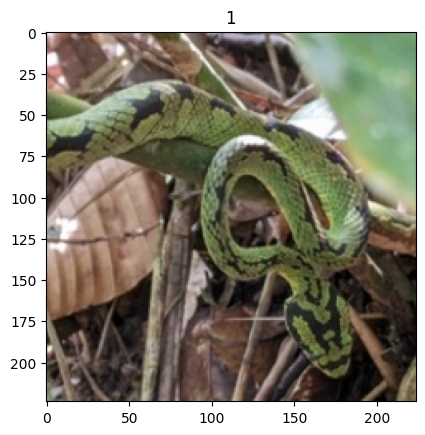

In [10]:
plt.imshow(test_np_images[2650])
plt.title(test_labels[2650])
plt.show()

In [11]:
# Predicted labels for the images
predicted_labels = []
for test_image in test_images:
    img_array = np.expand_dims(test_image, axis=0)
    # img_array = img_array / 255.0  # Normalize the image
    prediction = model.predict(img_array)
    predicted_labels.append(np.argmax(prediction))

1/1 [==============================] - 0s 19ms/step


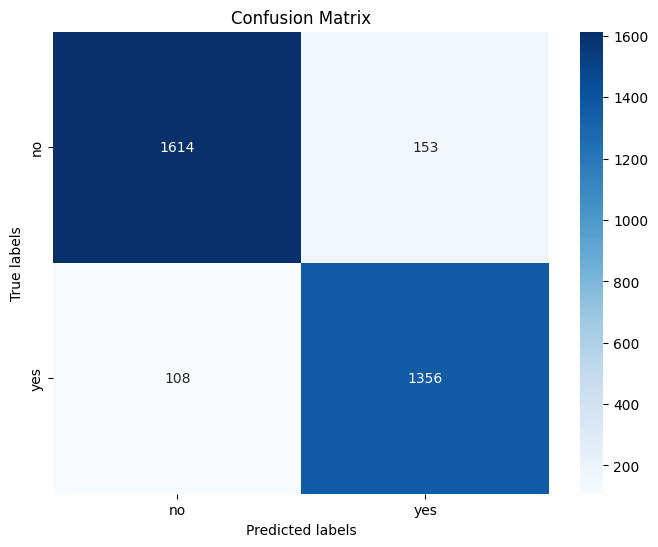

In [12]:
# Create confusion matrix
conf_matrix = confusion_matrix(test_labels, predicted_labels)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['no', 'yes'], yticklabels=['no', 'yes'])
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()

In [13]:
# Generate classification report
class_report = classification_report(test_labels, predicted_labels, target_names=imageCategory)
print(class_report)

              precision    recall  f1-score   support

          no       0.94      0.91      0.93      1767
         yes       0.90      0.93      0.91      1464

    accuracy                           0.92      3231
   macro avg       0.92      0.92      0.92      3231
weighted avg       0.92      0.92      0.92      3231

